TextMining Project M2 ISF : Pretraitement des données
--
<br>

### I. Chargement des package

In [211]:
%%time
#Web querry
from bs4 import BeautifulSoup
from lxml import html
import requests
import urllib.request
import re
#dataset bulding
import pandas as pd
import numpy as np
import time
from functools import reduce
from random import shuffle
import matplotlib.pyplot as plt
import os 

try:
    from wordcloud import WordCloud
except:
    !!pip install wordcloud
    from wordcloud import WordCloud
    
    
# installation du package nltk
try:
    import nltk
    from nltk.corpus import stopwords
    !! pip install nltk
except Exception as e:
    !! pip install nltk
    import nltk
    from nltk.corpus import stopwords
    
#warning
import warnings
warnings.filterwarnings("ignore")

Wall time: 2.04 s


### II. Chargement des données

In [212]:
ls = [c for c in os.listdir() if c.endswith("csv")]
ls

['base_brut.csv']

In [213]:
df = pd.read_csv(ls[0])
df.head()

,Produit,Allergène,Score,Lien,pix,Description,composition
0,24 ELLE & VIRE Beurre tendre doux 250g,lait,na,https://www.auchan.fr/elle-vire-beurre-tendre-...,1,nos maitres beurriers normands ont invente le ...,"creme origine france, matiere grasse lait..."
1,21 ELLE & VIRE Mini-beurre doux gastronomi...,lait,na,https://www.auchan.fr/elle-vire-mini-beurre-do...,2,na,"creme origine france, matiere grasse lait..."
2,12 ELLE & VIRE Beurre roulé doux de Condé ...,lait,na,https://www.auchan.fr/elle-vire-beurre-roule-d...,3,na,beurre lait origine normandie
3,14 BRIDELICE Crème fouettée légère en bomb...,lait et ses derives,na,https://www.auchan.fr/bridelice-creme-fouettee...,4,na,na
4,ELLE & VIRE Beurre tendre demi-sel barquet...,lait,na,https://www.auchan.fr/elle-vire-beurre-tendre-...,5,le beurre tendre d’elle vire est un beurre f...,"creme origine france, matiere grasse lait..."


### III. Consctruction des fonctions de pretraitement

In [214]:
def get_lower_values(data,varaible_list:list):
    
    """
    Cette fonction premet d'hommogeneiser l'ensemble des varaibles 
    de type chaine de caractere en les mettent tous à niveau miniscule.
    
    params:
    ------
    - data : DataFrame
    - variable_list : liste des varaible à homogenéiser 
    
    result:
    ------
    - data : DataFrame avec l'ensemble des varaible mit à niverau
    
    """
    for c in varaible_list:
        try:
            if data[c].dtypes =="object":
                data[c] = [k.lower() for k in data[c]]
        except:
            pass
        
    return data

In [215]:
def regex(string=""):
    
    """
    junhbunxjndubcjednesjijxdiej,
    
    """
    res = string.lower()
    res = re.sub("(ingrédients|\\xa0|\d+,?\d+%|[dl]['´]|\.+|[\*:\(\)\.\d%&-]|!)" , 
            ' ',res)    
    patterns = {"ommesdeter" : "(ommes de ter)|(omme de ter)" ,
                "huilede" : "huile de " ,
                "huiled" : "huile d'" ,
                "a" : "[âäàá]" ,
                "e" : "[éèêë]" ,
                "i" : "[íìîï]" ,
                "o" : "[óòôö]" ,
                "u" : "[úùûü]" ,
                "c" : "ç" ,
                "n" : "ñ" ,
                "," : " ," ,
                "oe": "œ",
                "" : "//",
                "" : "!",
                "" : "\u200b",
                "" : "  ",
                "" : "   ",
                "" : "      ",
                }
    for key in patterns:
        res = re.sub(patterns[key] , key , res)
    return res.strip()

In [216]:
def filter_stop_word(varaible:str,data):
        
    # importation du package nltk
    import nltk
    from nltk.corpus import stopwords
    
    # construction du corpus de stop word utile à notre analyse
    add = ["derives","presence","produits","base","compris","y","allergenes   voir les ingredients en lettres majuscules",
           "contient","concentrations","plus","mg/kg","mg/litre","expr","en","so","contenant","peut","contenir","traces",
           "possibles","ingredient",">","mg /kg",";","[carya illinoiesis  wangenh   k  koch]","l","pr�sence","leurs","a",
           "vache","variable",",","'","naturels,",'e',"rape,","lever","variable,","concentre",'extrait','entier',
           'organismes',]
    
    sw_nltk = stopwords.words('french')
    stop_word = sw_nltk + add
    
    # pretetement 
    lol = {'au': ' * ','aux': ' * ','avec': ' * ','ce': ' * ','ces': ' * ','dans': ' * ',
           'de': ' * ','des': ' * ','du': ' * ','elle': ' * ','en': ' * ','et': ' * ',
           'eux': ' * ','il': ' * ','ils': ' * ','je': ' * ','la': ' * ','le': ' * ','les': ' * ',
           'leur': ' * ','lui': ' * ','ma': ' * ','mais': ' * ','me': ' * ','même': ' * ','mes': ' * ',
           'moi': ' * ','mon': ' * ','ne': ' * ','nos': ' * ','notre': ' * ','nous': ' * ','on': ' * ',
           'ou': ' * ','par': ' * ','pas': ' * ','pour': ' * ','qu': ' * ','que': ' * ','qui': ' * ',
           'sa': ' * ','se': ' * ','ses': ' * ','son': ' * ','sur': ' * ','ta': ' * ','te': ' * ',
           'tes': ' * ','toi': ' * ','ton': ' * ','tu': ' * ','un': ' * ','une': ' * ','vos': ' * ',
           'votre': ' * ','vous': ' * ','c': ' * ','d': ' * ','j': ' * ','l': ' * ','à': ' * ','m': ' * ',
           'n': ' * ','s': ' * ','t': ' * ','y': ' * ','été': ' * ','étée': ' * ','étées': ' * ',
           'étés': ' * ','étant': ' * ','étante': ' * ','étants': ' * ','étantes': ' * ','suis': ' * ',
           'es': ' * ','est': ' * ','sommes': ' * ','êtes': ' * ','sont': ' * ','serai': ' * ','seras': ' * '
           ,'sera': ' * ','serons': ' * ','serez': ' * ','seront': ' * ','serais': ' * ','serait': ' * '
           ,'serions': ' * ','seriez': ' * ','seraient': ' * ','étais': ' * ','était': ' * ','étions': ' * '
           ,'étiez': ' * ','étaient': ' * ','fus': ' * ','fut': ' * ','fûmes': ' * ','fûtes': ' * ',
           'furent': ' * ','sois': ' * ','soit': ' * ','soyons': ' * ','soyez': ' * ','soient': ' * '
           ,'fusse': ' * ','fusses': ' * ','fût': ' * ','fussions': ' * ','fussiez': ' * ',
           'fussent': ' * ','ayant': ' * ','ayante': ' * ','ayantes': ' * ','ayants': ' * ',
           'eu': ' * ','eue': ' * ','eues': ' * ','eus': ' * ','ai': ' * ','as': ' * ','avons': ' * '
           ,'avez': ' * ','ont': ' * ','aurai': ' * ','auras': ' * ','aura': ' * ','aurons': ' * ',
           'aurez': ' * ','auront': ' * ','aurais': ' * ','aurait': ' * ','aurions': ' * ','auriez': ' * '
           ,'auraient': ' * ','avais': ' * ','avait': ' * ','avions': ' * ','aviez': ' * ','avaient': ' * ',
           'eut': ' * ','eûmes': ' * ','eûtes': ' * ','eurent': ' * ','aie': ' * ','aies': ' * ','ait': ' * ',
           'ayons': ' * ','ayez': ' * ','aient': ' * ','eusse': ' * ','eusses': ' * ','eût': ' * ',
           'eussions': ' * ','eussiez': ' * ','eussent': ' * ','derives': ' * ','presence': ' * ',
           'produits': ' * ','base': ' * ','compris': ' * ','allergenes   voir les ingredients en lettres majuscules': ' * ',
           'contient': ' * ','concentrations': ' * ','plus': ' * ','mg/kg': ' * ','mg/litre': ' * ','expr': ' * ',
           'so': ' * ','contenant': ' * ','peut': ' * ','contenir': ' * ','traces': ' * ','possibles': ' * ',
           'ingredient': ' * ','>': ' * ','mg /kg': ' * ',';': ' * ','[carya illinoiesis  wangenh   k  koch]': ' * ',
           'pr�sence': ' * ','leurs': ' * ','a': ' * ','vache': ' * ','variable': ' * ',',': ' * ',"'": ' * ',
           'naturels,': ' * ','e': ' * ','rape,': ' * ','lever': ' * ','variable,': ' * ','concentre': ' * ',
           'extrait': ' * ','entier': ' * ','organismes': ' * ',"colorant  e   d": ' * ',"dont" : " * ",
           "mineralisation totale  en mg/litre" : " * ","teneur totale en" : " * ","°c     mg/litre  ph " : " * ",
           "extrait": " * ","acidifiants" : " * ","extrait" : " * ","et":" * ","naturelle gazeuse perrier" : " * ",
           "autres":" * ","mais en proportion variable" : " * ","puree concentree" : " * ","concentre" : "*",
           "si":"*","necessaire":"*","reguler":"*","l’acidite":"*","":"*",",": " ,","ou":"/",'"':'',",":" ",
           "[carya illinoiesis  wangenh   k  koch]":"","oeufstraces":"oeufs","d'":"",
           "sans substances actuellement repertoriees par la reglementation europeenne comme responsables  allergie cutanee":"aucun"
          }
    for key,val in zip(lol.keys(),lol.values()):
        data[varaible] = data[varaible].replace(key,val)
        
    # suppression de stopword
    value = list()
    item = []
    for text in data[varaible]:
        item = {word for word in text.split() if word.lower() not in stop_word}
        item = {c.strip(",") for c in item}
        item = list(item)
        value.append(list(item))
    data[varaible] = value 
    return data[varaible]

In [413]:
def clean_stopword(list_string:list):
    
    trans = list()
    for c in list_string:
        if c.count(",") != 0:
            ss = c.split(",")
            trans = ss + trans
        elif c.count("#") != 0 :
            ss = c.split("#")
            trans = ss + trans
        elif c.count("]") != 0 :
            ss = c.split("]")
            trans = ss + trans
        elif c.count("[") != 0 :
            ss = c.split("[")    
        elif c.count("❤") != 0:
            ss = c.split("❤")
            trans = ss + trans        
        elif c.count("'") != 0:
            ss = c.split("'")
            trans = ss + trans    
        else:
            trans.append(c)
        
    final_list = list()
    for c in trans:
        try:
            if len(c) != 0 and c[-1] == "s" and c != 'pois' and c != "ananas" and c != 'mais' and c != "anis" and c != 'cassis' and c != "jus" and c != 'gras':
                s = c[:-1]
                final_list.append(s)
            else:
                s = c
                final_list.append(s)
        except:
            print([c])
    return final_list

**Mise a niveau des caracteristique : conversion de toute les chaine de caractere en miniscule**

In [217]:
df = get_lower_values(df,df.columns)

In [218]:
df.head()

,Produit,Allergène,Score,Lien,pix,Description,composition
0,24 elle & vire beurre tendre doux 250g,lait,na,https://www.auchan.fr/elle-vire-beurre-tendre-...,1,nos maitres beurriers normands ont invente le ...,"creme origine france, matiere grasse lait..."
1,21 elle & vire mini-beurre doux gastronomi...,lait,na,https://www.auchan.fr/elle-vire-mini-beurre-do...,2,na,"creme origine france, matiere grasse lait..."
2,12 elle & vire beurre roulé doux de condé ...,lait,na,https://www.auchan.fr/elle-vire-beurre-roule-d...,3,na,beurre lait origine normandie
3,14 bridelice crème fouettée légère en bomb...,lait et ses derives,na,https://www.auchan.fr/bridelice-creme-fouettee...,4,na,na
4,elle & vire beurre tendre demi-sel barquet...,lait,na,https://www.auchan.fr/elle-vire-beurre-tendre-...,5,le beurre tendre d’elle vire est un beurre f...,"creme origine france, matiere grasse lait..."


**Traitement des stop word**

In [219]:
df['composition'] = filter_stop_word('composition',df)

In [220]:
df.head(5)

,Produit,Allergène,Score,Lien,pix,Description,composition
0,24 elle & vire beurre tendre doux 250g,lait,na,https://www.auchan.fr/elle-vire-beurre-tendre-...,1,nos maitres beurriers normands ont invente le ...,"[matiere, ferments, france, origine, grasse, c..."
1,21 elle & vire mini-beurre doux gastronomi...,lait,na,https://www.auchan.fr/elle-vire-mini-beurre-do...,2,na,"[matiere, ferments, france, origine, grasse, c..."
2,12 elle & vire beurre roulé doux de condé ...,lait,na,https://www.auchan.fr/elle-vire-beurre-roule-d...,3,na,"[lait, normandie, beurre, origine]"
3,14 bridelice crème fouettée légère en bomb...,lait et ses derives,na,https://www.auchan.fr/bridelice-creme-fouettee...,4,na,[na]
4,elle & vire beurre tendre demi-sel barquet...,lait,na,https://www.auchan.fr/elle-vire-beurre-tendre-...,5,le beurre tendre d’elle vire est un beurre f...,"[matiere, ferments, france, sel, origine, gras..."


**Pretraitement pour quelque statistique descriptif**

In [221]:
wordsFiltered = reduce(lambda a, b : a + b , df['composition'])
shuffle(wordsFiltered)

In [421]:
intrus = ['/', '<', '=', '[','°c', '–', '’','u', 'ue', 'uitgedrukt', 'utilisation', 'utilise', 'van',']',"o",'acidifiant', 
          'a', 'aan', 'ab','acid','adaptes','afin','aide','allergenes','ancienne','apres','argentine','afrique','patissier',
         'assurer', 'atelier', 'atmosphere', 'autres','avant','b', 'b,b','biologiquesans', 'biologiquespeut','alliance',
          'biologiquestonyu','biologiquefabrique','blanc','bleu','bouillon','boulangere', 'boulangerie','acai','acidite',
         'bretagne','brun','caracteristique', 'caracteristiques','carbonates','certifie', 'certified', 'certifiee', 'oxidized',
         'chili', 'chine','ci','citrique,correcteur','classe','claude','clou','complete', 'completes', 'composition',
          'commplete', 'complet','concentre','concentree', 'concentres','conditionne','conservateur', 'conservateurs', 
          'consommer','controle','correcteur', 'correcteurs','couvercle', 'couverture','cuisson', 'cuit', 'cuite','ouverture',
          'cuites','d','d;','date','decortiquees','demi','demineralise', 'demineralise²', 'denat', 'derive','derivestraces',
          'desactivee','dont', 'douces', 'doux','dur', 'durable','dure', 'd\x92acides', 'd’','d’origine','d’utiliser', 'e',
          'emballage','entier', 'entiere', 'entier²', 'entrant', 'epa','epuisees', 'equitable', 'equivalent','ete', 'etes',
          'eventuelles', 'exige','exprime', 'exprimes', 'extra', 'extract', 'extraite', 'extraits','f', 'fabrique','ferment', 
          'ferments','figurant', 'filets', 'fini', 'fins','francais', 'france','g','gazeifiee,colorant', 'gazeifiee;', 
          'gazeuse','haute','hors','i', 'in', 'independants','indiques', 'indonesie','ingredients','intense', 'inverti', 
          'invites','issu', 'issue','issus','jaune', 'jour','k,acidifiants', 'k;','laitfabrique','lettres','liste', 'listes',
          'liveche,origan', 'loi','l\x92acide', 'l’acidite', 'l’agriculture','majucules', 'majuscules','malaisie','marque',
          'matiere', 'max', 'mb/l', 'melange','mer','mg/l','modifie','morceaux','n','naturelle','necessaire','no','citric',
          'non', 'normandie', 'nourrissons','obtenir','obtenus','oeuvre','ordinaire','origine','pacifique','allergene',
          'partiellement', 'partir','percentage', 'permeat','pays', 'peche','personnelle', 'petit', 'petits', 'ph',"pay"
          'plein','poly','pourcentage', 'pourobtenir', 'pp', 'preparation', 'preparations','prepare', 'pres', 'pressee',
          'producit', 'production','produit','proportion','rapidement', 'rapport','recette', 'reconstitue', 'referer', 
          'regles','reguler', 'regulierement','reine', 'residu','rouge','rouges','roux','sans','selon','semi','si','sous',
          'stabilisant','stabilisateur', 'stabilisator', 'standard','taux','tendre', 'teneur','toutes', 'traite','aop', 'apre',
          'traitement', 'transforme','tres','total', 'totale','agriculture','agricole','agent','adapte','alpha','bi','aqua',
          'alaska', 'alcohol','biologique','comme', 'commerce','coeur', 'coing',"cru",'culture','decortiquee','eindproduct',
          'elabore', 'elevee','epuisee','epaississant','eventuelle', 'extrait','ferreux','fin','francai',]
my_clean_list = []

for c in clean_stopword(wordsFiltered):
    if c in intrus:
        c = c.replace(c,"*")
        my_clean_list.append(c)
    else:
        my_clean_list.append(c.strip(";"))

**construction de la table utile au statistique descriptif**

In [424]:
dict_freq = dict()
for c in np.unique(my_clean_list):
    dict_freq[c] = my_clean_list.count(c)
    
x = list(dict_freq.keys())
y = list(dict_freq.values())
resume = pd.DataFrame({"Composition":x,"Total":y})
resume.sort_values(by="Total",inplace=True,ascending=False)
resume.drop([0,1],axis=0,inplace=True)
resume.reset_index(drop=True,inplace=True)

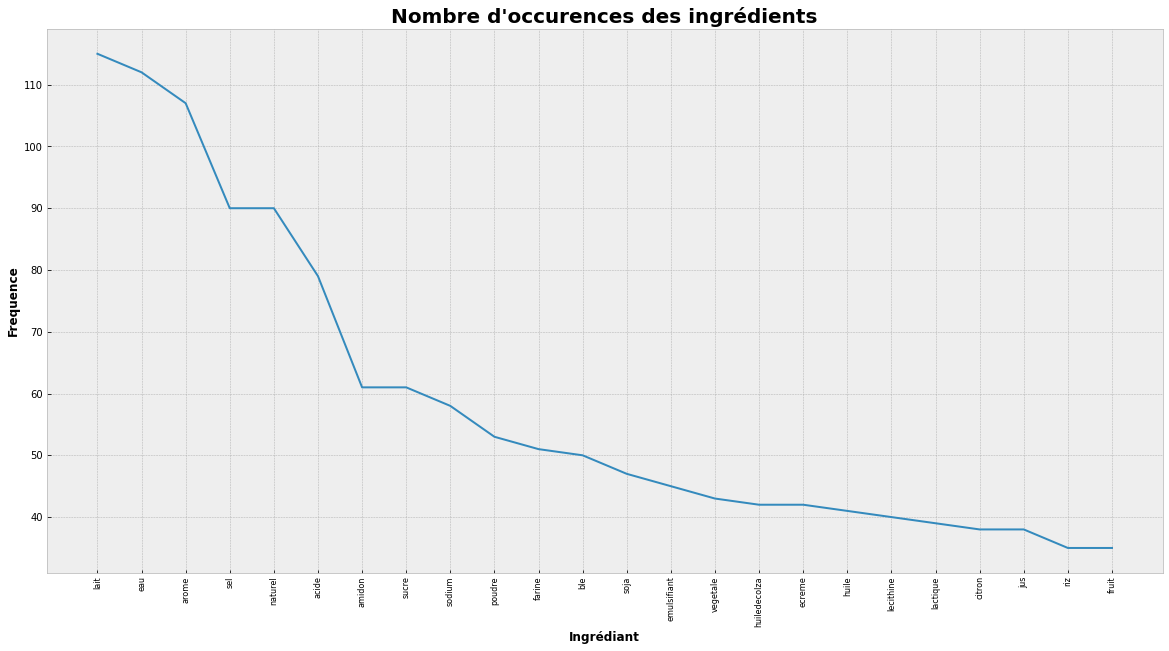

In [573]:
lol = resume.loc[resume["Total"] > 34]
lol = lol[1:]
idx = [c for c in lol["Composition"]]
value = [c for c in lol["Total"]]
with plt.style.context("bmh"):
    plt.figure(figsize=(20,10))
    plt.plot(idx,value)
    plt.xticks(idx,rotation=90,size=8)
    plt.xlabel("Ingrédiant",fontweight="bold",fontsize=12)
    plt.ylabel("Frequence",fontweight="bold",fontsize=12)
    plt.title("Nombre d'occurences des ingrédients",fontname="Times New Roman Bold",fontweight="bold",fontsize=20);

In [574]:
def show_wordcloud(list_var, title = None):
    
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stop_,
        max_words=25,
        max_font_size=40, 
        scale=5,
        random_state=1 # chosen at random by flipping a coin; it was heads
    ).generate(str(list_var))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontname="Times New Roman Bold",fontweight="bold",fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

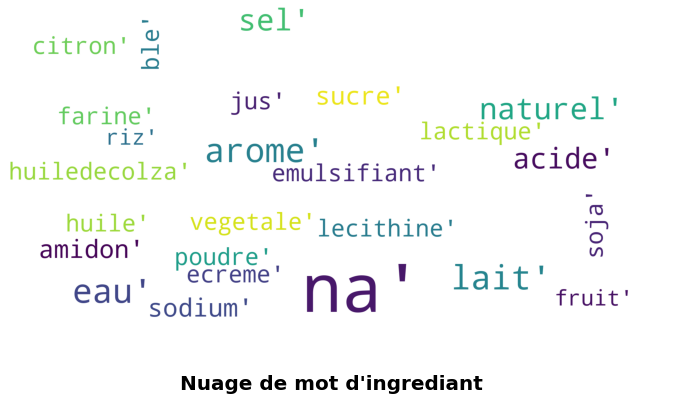

In [575]:
show_wordcloud(my_clean_list,"Nuage de mot d'ingrediant")

In [576]:
i = 0
lst_replace = list()
seuil = [472,945,709,709,1894]
for c in df.Score:
    if i <= seuil[0] and c == "na":
        lst_replace.append("a")
        i+=1
    elif i > seuil[0] and i <= seuil[1] and c == "na": 
        lst_replace.append("c")
        i+=1
    elif i > seuil[1] and i <= seuil[2] and c == "na":
        lst_replace.append("b")
        i+=1
    elif i > seuil[2] and i <= seuil[3] and c == "na":
        lst_replace.append("e")
        i+=1
    elif i > seuil[3] and i <= seuil[4] and c == "na":
        lst_replace.append("d")
        i+=1
    else:
        lst_replace.append(c)
df["Score"] = lst_replace

In [577]:
base_analyse = df.loc[df.Score!="na"]

In [578]:
top_15_freq = lol.Composition.tolist()

In [579]:
for word in top_15_freq:
    base_analyse[word] = base_analyse.composition.apply(lambda x : int(word in x))

In [580]:
base_analyse.drop(['Produit', 'Allergène','Lien', 'pix', 'Description','composition'],axis=1,inplace=True)

In [581]:
base_analyse["Score"] = [c.upper() for c in base_analyse["Score"]]

In [582]:
base_analyse

,Score,lait,eau,arome,sel,naturel,acide,amidon,sucre,sodium,...,vegetale,huiledecolza,ecreme,huile,lecithine,lactique,citron,jus,riz,fruit
0,A,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,A,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,A,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,A,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,A,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6700,D,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6704,C,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6705,D,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6710,D,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [583]:
def save_data(base,name:str):
    from numpy.random import permutation
    base = base.reset_index(drop=True)
    ind = permutation(base.index)
    base = base.iloc[ind, :].reset_index(drop=True)
    return base.to_csv(name+".csv",sep=',',index=False)

In [584]:
save_data(base_analyse,"base_model_final")